# Set the environment

In [1]:
# set the envoiroment
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.flux_analysis import flux_variability_analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import escher
from escher import Builder
from utils import show_map
from utils.check_precursor_problem import check_precursor_problem

CPLEX is available but could not load with error:
  Traceback (most recent call last):
    File "C:\Users\yanfei1208\Anaconda2\envs\py36\lib\site-packages\optlang\__init__.py", line 43, in <module>
      from optlang import cplex_interface
    File "C:\Users\yanfei1208\Anaconda2\envs\py36\lib\site-packages\optlang\cplex_interface.py", line 33, in <module>
      from cplex.exceptions import CplexSolverError
  ModuleNotFoundError: No module named 'cplex.exceptions'


In [10]:
escher.__version__

'1.7.2'

## load the model published by Schomburg group in 2016

In [2]:
model = cobra.io.read_sbml_model('../models/Sulfolobus-solfataricus_D-glucose.xml')

In [3]:
map_loc = "../data/10.122.json"

In [5]:
model.reactions.get_by_id("carb_enter_2.7.1.40_PEPDEPHOS__RXN")

Reaction identifier,carb_enter_2.7.1.40_PEPDEPHOS__RXN
Name,carb_enter_2.7.1.40_PEPDEPHOS-RXN
Memory address,0x01d09865d320
Stoichiometry,ADP + phosphoenolpyruvate --> ATP + pyruvate ADP + phosphoenolpyruvate --> ATP + pyruvate
GPR,
Lower bound,-0.0
Upper bound,1000.0


In [4]:
Builder()

Builder()

In [14]:
# change this reaction to be reversible, it is more reasonable. 
model.reactions.get_by_id("prot_prot__lactate").bounds = (-1000,1000)
# make this reaction without participation of proton
model.reactions.get_by_id("T_symporter_(S)__lactic_acid").reaction = "(S)__lactic_acid <=> (S)__lactic_acid_ex"

In [15]:
# give a bounds to the glucose exchange reaction
model.reactions.get_by_id("T_flux_beta__D__glucose").upper_bound = -0
model.reactions.get_by_id("T_flux_beta__D__glucose").lower_bound = -1

# The following code is used to change the reactions that are not right.

In [17]:
# for rxn in model.reactions:
#     if "T_flux_L" in rxn.id:
#         print (rxn.id)
#         rxn.bounds = (0,0)

In [18]:
## change the reaction of D-glyceraldehyde dehydrogenase
# reaction = Reaction('glycongen_exchange')
# reaction.name = 'glycongen'
# reaction.lower_bound = -1000.  # This is the default
# reaction.upper_bound = 1000.  # This is the default
# model.add_reactions([reaction])
# reaction.add_metabolites({"glycogen":-1.0})
# reaction.reaction

# Using oxdative phosphorylation redox SoxABCD

In [7]:
#GAPDH reaction NADPH
model.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP").upper_bound= 1000
model.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP").lower_bound=-1000

## Using GAPDH and PGK pathway

In [8]:
M = model.copy()
M.objective  = M.reactions.NGAM
sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


NGAM 	 15.53750000000001 	 ATP + H2O --> ADP + H+ + phosphate 

T_flux_CO2 	 6.780000000000007 	 CO2_ex <=>  

T_trans_CO2 	 6.780000000000007 	 CO2 <=> CO2_ex 

T_flux_H+ 	 -11.017500000000013 	 H+_ex <=>  

T_trans_H+ 	 -11.017500000000013 	 H+ <=> H+_ex 

T_flux_H2O 	 6.780000000000002 	 H2O_ex <=>  

T_trans_H2O 	 6.780000000000002 	 H2O <=> H2O_ex 

T_flux_oxygen 	 -6.780000000000002 	 oxygen_ex <=>  

T_trans_oxygen 	 -6.780000000000002 	 oxygen <=> oxygen_ex 

T_flux_beta__D__glucose 	 -1.13 	 beta__D__glucose_ex <=>  

T_ABC__transporter_beta__D__glucose 	 1.13 	 ATP + H2O + beta__D__glucose_ex --> ADP + beta__D__glucose + phosphate 

carb_entner_1.1.1.359_GLUCOSE__1__DEHYDROGENASE__NAD+__RXN 	 1.13 	 NAD+ + beta__D__glucose --> D__glucono__1,5__lactone + H+ + NADH 

carb_entner_3.1.1.17_GLUCONOLACT__RXN 	 1.1300000000000001 	 D__glucono__1,5__lactone + H2O --> D__gluconate 

carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN 	 1.1300000000000001 	 D__gluconate --> 2__dehydro__3

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.0, 'Biomass__fuc…

## Using Non-phosphorylation pathway

In [23]:
M = model.copy()
M.objective  = model.reactions.NGAM
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


NGAM 	 12.750000000000004 	 ATP + H2O --> ADP + H+ + phosphate 

T_flux_CO2 	 6.000000000000002 	 CO2_ex <=>  

T_trans_CO2 	 6.000000000000001 	 CO2 <=> CO2_ex 

T_flux_H+ 	 -9.749999999999993 	 H+_ex <=>  

T_trans_H+ 	 -9.749999999999993 	 H+ <=> H+_ex 

T_flux_H2O 	 6.0 	 H2O_ex <=>  

T_trans_H2O 	 6.0 	 H2O <=> H2O_ex 

T_flux_oxygen 	 -6.0 	 oxygen_ex <=>  

T_trans_oxygen 	 -5.999999999999999 	 oxygen <=> oxygen_ex 

T_flux_beta__D__glucose 	 -1.0 	 beta__D__glucose_ex <--  

T_ABC__transporter_beta__D__glucose 	 0.9999999999999999 	 ATP + H2O + beta__D__glucose_ex --> ADP + beta__D__glucose + phosphate 

carb_entner_1.1.1.359_GLUCOSE__1__DEHYDROGENASE__NAD+__RXN 	 1.0 	 NAD+ + beta__D__glucose --> D__glucono__1,5__lactone + H+ + NADH 

carb_entner_3.1.1.17_GLUCONOLACT__RXN 	 1.0000000000000002 	 D__glucono__1,5__lactone + H2O --> D__gluconate 

carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN 	 1.0000000000000002 	 D__gluconate --> 2__dehydro__3__deoxy__D__gluconate + H2O 

c

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.0, 'Biomass__fuc…

## Using GAPDH and spontaneous degradation of BPG

In [24]:
M = model.copy()
M.objective  = model.reactions.NGAM
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
M.reactions.get_by_id('carb_entner_4.1.2.55_DHDOGALDOL__RXN').bounds = (0,0)

sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


NGAM 	 12.750000000000012 	 ATP + H2O --> ADP + H+ + phosphate 

T_flux_CO2 	 6.000000000000006 	 CO2_ex <=>  

T_trans_CO2 	 6.000000000000006 	 CO2 <=> CO2_ex 

T_flux_H+ 	 -10.750000000000012 	 H+_ex <=>  

T_trans_H+ 	 -10.750000000000012 	 H+ <=> H+_ex 

T_flux_H2O 	 6.000000000000005 	 H2O_ex <=>  

T_trans_H2O 	 6.000000000000005 	 H2O <=> H2O_ex 

T_flux_oxygen 	 -6.000000000000005 	 oxygen_ex <=>  

T_trans_oxygen 	 -6.000000000000006 	 oxygen <=> oxygen_ex 

T_flux_beta__D__glucose 	 -1.0 	 beta__D__glucose_ex <--  

T_ABC__transporter_beta__D__glucose 	 0.9999999999999999 	 ATP + H2O + beta__D__glucose_ex --> ADP + beta__D__glucose + phosphate 

carb_entner_1.1.1.359_GLUCOSE__1__DEHYDROGENASE__NAD+__RXN 	 1.0 	 NAD+ + beta__D__glucose --> D__glucono__1,5__lactone + H+ + NADH 

carb_entner_3.1.1.17_GLUCONOLACT__RXN 	 1.0000000000000002 	 D__glucono__1,5__lactone + H2O --> D__gluconate 

carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN 	 1.0000000000000002 	 D__gluconate --> 

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.0, 'Biomass__fuc…

## Using GAPN

In [25]:
M = model.copy()
M.objective  = model.reactions.NGAM
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
M.reactions.get_by_id('carb_entner_4.1.2.55_DHDOGALDOL__RXN').bounds = (0,0)
M.reactions.get_by_id('other_no__pathway_3.6.1.7_BS165362').bounds = (0,0)

sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


NGAM 	 12.750000000000005 	 ATP + H2O --> ADP + H+ + phosphate 

T_flux_CO2 	 6.000000000000003 	 CO2_ex <=>  

T_trans_CO2 	 6.000000000000002 	 CO2 <=> CO2_ex 

T_flux_H+ 	 -10.750000000000005 	 H+_ex <=>  

T_trans_H+ 	 -10.750000000000005 	 H+ <=> H+_ex 

T_flux_H2O 	 6.000000000000002 	 H2O_ex <=>  

T_trans_H2O 	 6.000000000000002 	 H2O <=> H2O_ex 

T_flux_oxygen 	 -6.000000000000001 	 oxygen_ex <=>  

T_trans_oxygen 	 -6.000000000000001 	 oxygen <=> oxygen_ex 

T_flux_beta__D__glucose 	 -1.0 	 beta__D__glucose_ex <--  

T_ABC__transporter_beta__D__glucose 	 0.9999999999999999 	 ATP + H2O + beta__D__glucose_ex --> ADP + beta__D__glucose + phosphate 

carb_entner_1.1.1.359_GLUCOSE__1__DEHYDROGENASE__NAD+__RXN 	 1.0 	 NAD+ + beta__D__glucose --> D__glucono__1,5__lactone + H+ + NADH 

carb_entner_3.1.1.17_GLUCONOLACT__RXN 	 1.0000000000000002 	 D__glucono__1,5__lactone + H2O --> D__gluconate 

carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN 	 1.0000000000000002 	 D__gluconate --> 

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.0, 'Biomass__fuc…

## Using methylglyoxal pathway

In [26]:
M = model.copy()
M.objective  = model.reactions.NGAM
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
M.reactions.get_by_id('carb_entner_4.1.2.55_DHDOGALDOL__RXN').bounds = (0,0)
M.reactions.get_by_id('other_no__pathway_3.6.1.7_BS165362').bounds = (0,0)
M.reactions.get_by_id('carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN').bounds = (0,0)

sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


NGAM 	 9.999999999999996 	 ATP + H2O --> ADP + H+ + phosphate 

T_flux_CO2 	 6.000000000000001 	 CO2_ex <=>  

T_trans_CO2 	 5.999999999999999 	 CO2 <=> CO2_ex 

T_flux_H+ 	 -7.999999999999992 	 H+_ex <=>  

T_trans_H+ 	 -7.999999999999991 	 H+ <=> H+_ex 

T_flux_H2O 	 5.999999999999996 	 H2O_ex <=>  

T_trans_H2O 	 5.999999999999996 	 H2O <=> H2O_ex 

T_flux_oxygen 	 -5.999999999999998 	 oxygen_ex <=>  

T_trans_oxygen 	 -5.999999999999998 	 oxygen <=> oxygen_ex 

T_flux_beta__D__glucose 	 -1.0 	 beta__D__glucose_ex <--  

T_ABC__transporter_beta__D__glucose 	 0.9999999999999999 	 ATP + H2O + beta__D__glucose_ex --> ADP + beta__D__glucose + phosphate 

carb_entner_1.1.1.359_GLUCOSE__1__DEHYDROGENASE__NAD+__RXN 	 1.0 	 NAD+ + beta__D__glucose --> D__glucono__1,5__lactone + H+ + NADH 

carb_entner_3.1.1.17_GLUCONOLACT__RXN 	 1.0000000000000002 	 D__glucono__1,5__lactone + H2O --> D__gluconate 

carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN 	 1.0000000000000002 	 D__gluconate --> 2__

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.0, 'Biomass__fuc…

# Using oxdative phosphorylation redox SoxM 

## Using GAPDH and PGK pathway

In [11]:
model.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').reaction

'6.0 H+ + 0.5 oxygen + representative_quinol --> 4.0 H+_rc + H2O + representative_quinone'

In [27]:
M = model.copy()
M.objective  = model.reactions.NGAM
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


NGAM 	 7.750000000000007 	 ATP + H2O --> ADP + H+ + phosphate 

T_flux_CO2 	 6.000000000000005 	 CO2_ex <=>  

T_trans_CO2 	 6.000000000000005 	 CO2 <=> CO2_ex 

T_flux_H+ 	 8.250000000000004 	 H+_ex <=>  

T_trans_H+ 	 8.250000000000002 	 H+ <=> H+_ex 

T_flux_H2O 	 6.000000000000005 	 H2O_ex <=>  

T_trans_H2O 	 6.000000000000005 	 H2O <=> H2O_ex 

T_flux_oxygen 	 -6.0000000000000036 	 oxygen_ex <=>  

T_trans_oxygen 	 -6.0000000000000036 	 oxygen <=> oxygen_ex 

T_flux_beta__D__glucose 	 -1.0 	 beta__D__glucose_ex <--  

T_ABC__transporter_beta__D__glucose 	 0.9999999999999999 	 ATP + H2O + beta__D__glucose_ex --> ADP + beta__D__glucose + phosphate 

carb_entner_1.1.1.359_GLUCOSE__1__DEHYDROGENASE__NAD+__RXN 	 1.0 	 NAD+ + beta__D__glucose --> D__glucono__1,5__lactone + H+ + NADH 

carb_entner_3.1.1.17_GLUCONOLACT__RXN 	 1.0000000000000002 	 D__glucono__1,5__lactone + H2O --> D__gluconate 

carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN 	 1.0000000000000002 	 D__gluconate --> 2__

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.0, 'Biomass__fuc…

## Using Non-phosphorylation pathway

In [28]:
M = model.copy()
M.objective  = model.reactions.NGAM
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


NGAM 	 6.749999999999999 	 ATP + H2O --> ADP + H+ + phosphate 

T_flux_CO2 	 6.000000000000002 	 CO2_ex <=>  

T_trans_CO2 	 6.000000000000001 	 CO2 <=> CO2_ex 

T_flux_H+ 	 7.250000000000001 	 H+_ex <=>  

T_trans_H+ 	 7.25 	 H+ <=> H+_ex 

T_flux_H2O 	 5.999999999999997 	 H2O_ex <=>  

T_trans_H2O 	 5.999999999999997 	 H2O <=> H2O_ex 

T_flux_oxygen 	 -5.999999999999998 	 oxygen_ex <=>  

T_trans_oxygen 	 -5.999999999999998 	 oxygen <=> oxygen_ex 

T_flux_beta__D__glucose 	 -1.0 	 beta__D__glucose_ex <--  

T_ABC__transporter_beta__D__glucose 	 0.9999999999999999 	 ATP + H2O + beta__D__glucose_ex --> ADP + beta__D__glucose + phosphate 

carb_entner_1.1.1.359_GLUCOSE__1__DEHYDROGENASE__NAD+__RXN 	 0.9999999999999998 	 NAD+ + beta__D__glucose --> D__glucono__1,5__lactone + H+ + NADH 

carb_entner_3.1.1.17_GLUCONOLACT__RXN 	 0.9999999999999999 	 D__glucono__1,5__lactone + H2O --> D__gluconate 

carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN 	 0.9999999999999999 	 D__gluconate --> 2__

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.0, 'Biomass__fuc…

## Using GAPDH and spontaneous degradation of BPG

In [29]:
M = model.copy()
M.objective  = model.reactions.NGAM
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
M.reactions.get_by_id('carb_entner_4.1.2.55_DHDOGALDOL__RXN').bounds = (0,0)

sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


NGAM 	 6.749999999999999 	 ATP + H2O --> ADP + H+ + phosphate 

T_flux_CO2 	 6.000000000000002 	 CO2_ex <=>  

T_trans_CO2 	 6.000000000000001 	 CO2 <=> CO2_ex 

T_flux_H+ 	 7.250000000000001 	 H+_ex <=>  

T_trans_H+ 	 7.25 	 H+ <=> H+_ex 

T_flux_H2O 	 5.999999999999997 	 H2O_ex <=>  

T_trans_H2O 	 5.999999999999997 	 H2O <=> H2O_ex 

T_flux_oxygen 	 -5.999999999999998 	 oxygen_ex <=>  

T_trans_oxygen 	 -5.999999999999998 	 oxygen <=> oxygen_ex 

T_flux_beta__D__glucose 	 -1.0 	 beta__D__glucose_ex <--  

T_ABC__transporter_beta__D__glucose 	 0.9999999999999999 	 ATP + H2O + beta__D__glucose_ex --> ADP + beta__D__glucose + phosphate 

carb_entner_1.1.1.359_GLUCOSE__1__DEHYDROGENASE__NAD+__RXN 	 0.9999999999999998 	 NAD+ + beta__D__glucose --> D__glucono__1,5__lactone + H+ + NADH 

carb_entner_3.1.1.17_GLUCONOLACT__RXN 	 0.9999999999999999 	 D__glucono__1,5__lactone + H2O --> D__gluconate 

carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN 	 0.9999999999999999 	 D__gluconate --> 2__

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.0, 'Biomass__fuc…

## Using GAPN

In [30]:
M = model.copy()
M.objective  = model.reactions.NGAM
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
M.reactions.get_by_id('carb_entner_4.1.2.55_DHDOGALDOL__RXN').bounds = (0,0)
M.reactions.get_by_id('other_no__pathway_3.6.1.7_BS165362').bounds = (0,0)

sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


NGAM 	 6.750000000000011 	 ATP + H2O --> ADP + H+ + phosphate 

T_flux_CO2 	 6.000000000000028 	 CO2_ex <=>  

T_trans_CO2 	 6.0000000000000275 	 CO2 <=> CO2_ex 

T_flux_H+ 	 7.250000000000017 	 H+_ex <=>  

T_trans_H+ 	 7.250000000000015 	 H+ <=> H+_ex 

T_flux_H2O 	 6.000000000000015 	 H2O_ex <=>  

T_trans_H2O 	 6.000000000000015 	 H2O <=> H2O_ex 

T_flux_oxygen 	 -6.000000000000032 	 oxygen_ex <=>  

T_trans_oxygen 	 -6.000000000000032 	 oxygen <=> oxygen_ex 

T_flux_beta__D__glucose 	 -1.0 	 beta__D__glucose_ex <--  

T_ABC__transporter_beta__D__glucose 	 0.9999999999999999 	 ATP + H2O + beta__D__glucose_ex --> ADP + beta__D__glucose + phosphate 

carb_entner_1.1.1.359_GLUCOSE__1__DEHYDROGENASE__NAD+__RXN 	 0.9999999999999997 	 NAD+ + beta__D__glucose --> D__glucono__1,5__lactone + H+ + NADH 

carb_entner_3.1.1.17_GLUCONOLACT__RXN 	 0.9999999999999997 	 D__glucono__1,5__lactone + H2O --> D__gluconate 

carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN 	 0.9999999999999997 	 D__glu

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.0, 'Biomass__fuc…

## Using methylglyoxal pathway

In [31]:
M = model.copy()
M.objective  = model.reactions.NGAM
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
M.reactions.get_by_id('carb_entner_4.1.2.55_DHDOGALDOL__RXN').bounds = (0,0)
M.reactions.get_by_id('other_no__pathway_3.6.1.7_BS165362').bounds = (0,0)
M.reactions.get_by_id('carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN').bounds = (0,0)

sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


NGAM 	 5.0000000000000036 	 ATP + H2O --> ADP + H+ + phosphate 

T_flux_CO2 	 6.000000000000004 	 CO2_ex <=>  

T_trans_CO2 	 6.000000000000003 	 CO2 <=> CO2_ex 

T_flux_H+ 	 7.000000000000003 	 H+_ex <=>  

T_trans_H+ 	 7.000000000000001 	 H+ <=> H+_ex 

T_flux_H2O 	 5.999999999999999 	 H2O_ex <=>  

T_trans_H2O 	 5.999999999999999 	 H2O <=> H2O_ex 

T_flux_oxygen 	 -6.000000000000002 	 oxygen_ex <=>  

T_trans_oxygen 	 -6.000000000000002 	 oxygen <=> oxygen_ex 

T_flux_beta__D__glucose 	 -1.0 	 beta__D__glucose_ex <--  

T_ABC__transporter_beta__D__glucose 	 0.9999999999999999 	 ATP + H2O + beta__D__glucose_ex --> ADP + beta__D__glucose + phosphate 

carb_entner_1.1.1.359_GLUCOSE__1__DEHYDROGENASE__NAD+__RXN 	 1.0 	 NAD+ + beta__D__glucose --> D__glucono__1,5__lactone + H+ + NADH 

carb_entner_3.1.1.17_GLUCONOLACT__RXN 	 1.0000000000000002 	 D__glucono__1,5__lactone + H2O --> D__gluconate 

carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN 	 1.0000000000000002 	 D__gluconate --> 2__d

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.0, 'Biomass__fuc…

# Using oxdative phosphorylation redox SoxABCD with adding Biomass production 

## Using GAPDH and PGK pathway

In [32]:
M = model.copy()
M.reactions.Biomass.bounds = (0,10)
M.objective  = model.reactions.Biomass
sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


Biomass 	 0.0633422291044087 	 0.00982746 2,3__bis__O__phytanyl__sn__glycerol + 0.0509702 AMP + 0.0284903 CMP + 1.86443e-05 FAD + 0.0286278 GMP + 0.318868 L__alanine + 0.265678 L__arginine + 0.282307 L__asparagine + 0.266288 L__aspartate + 0.0350743 L__cysteine + 0.386098 L__glutamate + 0.119235 L__glutamine + 0.0733894 L__histidine + 0.00158663 L__homocysteine + 0.538865 L__isoleucine + 0.587444 L__leucine + 0.436349 L__lysine + 0.124839 L__methionine + 0.251495 L__phenylalanine + 0.216324 L__proline + 0.380966 L__serine + 0.268535 L__threonine + 0.0595077 L__tryptophan + 0.273427 L__tyrosine + 0.42246 L__valine + 0.00324411 NAD+ + 0.000149155 NADH + 0.000149155 NADP+ + 0.000596618 NADPH + 0.000149155 UDP__alpha__N__acetyl__D__glucosamine + 0.0515166 UMP + 0.000149155 coenzyme_A + 0.00693569 coenzyme_B12 + 0.0105384 dAMP + 0.00587329 dCMP + 0.00587329 dGMP + 0.0105384 dTMP + 0.365316 glycine + 0.542048 glycogen + 0.00274741 norspermidine + 0.00309084 norspermine + 0.000771875 phosphoe

aa_phe_tyr_trp_shiki_4.2.3.5_CHORISMATE__SYNTHASE__RXN 	 0.0371219018097703 	 5__enolpyruvyl__shikimate__3__phosphate --> chorismate + phosphate 

aa_trp_4.1.3.27_ANTHRANSYN__RXN 	 0.003769350366876421 	 L__glutamine + chorismate <=> L__glutamate + anthranilate + pyruvate 

aa_trp_2.4.2.18_PRTRANS__RXN 	 0.0037693503668764215 	 5__phospho__alpha__D__ribose_1__diphosphate + anthranilate --> N__(5'__phosphoribosyl)__anthranilate + diphosphate 

aa_trp_5.3.1.24_PRAISOM__RXN 	 0.003769350366876421 	 N__(5'__phosphoribosyl)__anthranilate --> 1__(o__carboxyphenylamino)__1'__deoxyribulose__5'__phosphate 

aa_trp_4.1.1.48_IGPSYN__RXN 	 0.003769350366876422 	 1__(o__carboxyphenylamino)__1'__deoxyribulose__5'__phosphate --> (1S,2R)__1__C__(indol__3__yl)glycerol_3__phosphate + CO2 + H2O 

aa_trp_4.2.1.20_RXN0__2381 	 0.0037693503668764215 	 (1S,2R)__1__C__(indol__3__yl)glycerol_3__phosphate <=> D__glyceraldehyde__3__phosphate + indole 

aa_trp_4.2.1.20_RXN0__2382 	 0.0037693503668764215 	 L__seri

cof_nad_2.7.1.23_NAD__KIN__RXN 	 4.7238924225932566e-05 	 ATP + NAD+ --> ADP + NADP+ 

cof_nad_salvage_2.4.2.11_nicotinate__phosphoribosyltransferase 	 -0.00043932206497712244 	 diphosphate + nicotinate_D__ribonucleotide <=> 5__phospho__alpha__D__ribose_1__diphosphate + nicotinate 

cof_tetrahydrosulfopterin_archaeosine_3.5.4.16_GTP__CYCLOHYDRO__I__RXN 	 0.0022048733186723064 	 GTP + H2O --> 7,8__dihydroneopterin_triphosphate + formate 

cof_tetrahydrosulfopterin_3.6.1.___H2NEOPTERINP3PYROPHOSPHOHYDRO__RXN 	 0.0022048733186723077 	 7,8__dihydroneopterin_triphosphate + H2O --> 7,8__dihydroneopterin_3'__phosphate + diphosphate 

cof_tetrahydrosulfopterin_3.6.1.___DIHYDRONEOPTERIN__MONO__P__DEPHOS__RXN 	 0.0022048733186723077 	 7,8__dihydroneopterin_3'__phosphate + H2O --> 7,8__dihydro__D__neopterin + phosphate 

cof_tetrahydrosulfopterin_neopterin 	 0.002204873318672308 	 7,8__dihydro__D__neopterin <=> neopterin 

cof_tetrahydrosulfopterin_sulfopterin 	 0.0022048733186724734 	 neopterin 

polyamines_2.5.1.126_RXN__15698 	 0.0001957806954050706 	 S__adenosyl__L__methioninamine + norspermidine <=> H+ + S__methyl__5'__thioadenosine + norspermine 

redox_1.5.1.36_FMNREDUCT__RXN_NAD 	 -0.0006589830974656831 	 FMNH2 + NAD+ <=> FMN + H+ + NADH 

redox_1.5.1.36_RXN__13750_WOP 	 1.4396041777474333e-06 	 FADH2 + NAD+ <=> FAD + 2.0 H+ + NADH 

redox_1.8.1.9_THIOREDOXIN__REDUCT__NADPH__RXN 	 -0.012385231274949239 	 H+ + NADP+ + |Red__Thioredoxin| <=> NADPH + |Ox__Thioredoxin| 

redox_1.18.1.3_FERREDOXIN____NAD+__REDUCTASE__RXN 	 1.767729555068135 	 H+ + NAD+ + 2.0 |Reduced__ferredoxins| <=> NADH + 2.0 |Oxidized__ferredoxins| 

conversion_4.2.1.1_RXN0__5224 	 -0.2193138767494219 	 H+ + hydrogen_carbonate <=> CO2 + H2O 

hydrolysis_3.6.1.1_BS383385 	 0.0004393220649771222 	 2.0 H2O + PPPi --> 3.0 phosphate 

hydrolysis_3.6.1.1_INORGPYROPHOSPHAT__RXN 	 0.2851044205373613 	 H2O + diphosphate --> 2.0 phosphate 

carb_degra__trehalose_trehalose_2.4.1.245_RXN__9613 	 7.548873495747012e-05

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.063342, 'Biomass…

## Using Non-phosphorylation pathway

In [33]:
M = model.copy()
M.reactions.Biomass.bounds = (0,10)
M.objective  = model.reactions.Biomass
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)

sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


Biomass 	 0.058397796104154694 	 0.00982746 2,3__bis__O__phytanyl__sn__glycerol + 0.0509702 AMP + 0.0284903 CMP + 1.86443e-05 FAD + 0.0286278 GMP + 0.318868 L__alanine + 0.265678 L__arginine + 0.282307 L__asparagine + 0.266288 L__aspartate + 0.0350743 L__cysteine + 0.386098 L__glutamate + 0.119235 L__glutamine + 0.0733894 L__histidine + 0.00158663 L__homocysteine + 0.538865 L__isoleucine + 0.587444 L__leucine + 0.436349 L__lysine + 0.124839 L__methionine + 0.251495 L__phenylalanine + 0.216324 L__proline + 0.380966 L__serine + 0.268535 L__threonine + 0.0595077 L__tryptophan + 0.273427 L__tyrosine + 0.42246 L__valine + 0.00324411 NAD+ + 0.000149155 NADH + 0.000149155 NADP+ + 0.000596618 NADPH + 0.000149155 UDP__alpha__N__acetyl__D__glucosamine + 0.0515166 UMP + 0.000149155 coenzyme_A + 0.00693569 coenzyme_B12 + 0.0105384 dAMP + 0.00587329 dCMP + 0.00587329 dGMP + 0.0105384 dTMP + 0.365316 glycine + 0.542048 glycogen + 0.00274741 norspermidine + 0.00309084 norspermine + 0.000771875 phosph

aa_phe_tyr_trp_shiki_1.1.1.25_RXN__7968_NADP 	 0.03422770803445304 	 3__dehydroshikimate + H+ + NADPH --> NADP+ + shikimate 

aa_phe_tyr_trp_shiki_2.7.1.71_SHIKIMATE__KINASE__RXN 	 0.03422420214028326 	 ATP + shikimate --> ADP + shikimate__3__phosphate 

aa_phe_tyr_trp_shiki_2.5.1.19_2.5.1.19__RXN 	 0.034224202140283266 	 phosphoenolpyruvate + shikimate__3__phosphate <=> 5__enolpyruvyl__shikimate__3__phosphate + phosphate 

aa_phe_tyr_trp_shiki_4.2.3.5_CHORISMATE__SYNTHASE__RXN 	 0.03422420214028327 	 5__enolpyruvyl__shikimate__3__phosphate --> chorismate + phosphate 

aa_trp_4.1.3.27_ANTHRANSYN__RXN 	 0.0034751185312272056 	 L__glutamine + chorismate <=> L__glutamate + anthranilate + pyruvate 

aa_trp_2.4.2.18_PRTRANS__RXN 	 0.003475118531227206 	 5__phospho__alpha__D__ribose_1__diphosphate + anthranilate --> N__(5'__phosphoribosyl)__anthranilate + diphosphate 

aa_trp_5.3.1.24_PRAISOM__RXN 	 0.0034751185312272056 	 N__(5'__phosphoribosyl)__anthranilate --> 1__(o__carboxyphenylamino)_

cof_nad_2.4.2.19_QUINOPRIBOTRANS__RXN 	 0.0002417106971910659 	 5__phospho__alpha__D__ribose_1__diphosphate + quinolinate --> CO2 + diphosphate + nicotinate_D__ribonucleotide 

cof_nad_2.7.7.18_NICONUCADENYLYLTRAN__RXN 	 0.00024171069719106588 	 ATP + nicotinate_D__ribonucleotide --> diphosphate + nicotinate_adenine_dinucleotide 

cof_nad_6.3.1.5_BR147 	 0.0002417106971910659 	 ATP + H+ + H2O + L__glutamine + nicotinate_adenine_dinucleotide --> AMP + L__glutamate + NAD+ + diphosphate 

cof_nad_2.7.1.23_NAD__KIN__RXN 	 4.355149959399717e-05 	 ATP + NAD+ --> ADP + NADP+ 

cof_nad_salvage_2.4.2.11_nicotinate__phosphoribosyltransferase 	 -0.0004050290104616247 	 diphosphate + nicotinate_D__ribonucleotide <=> 5__phospho__alpha__D__ribose_1__diphosphate + nicotinate 

cof_tetrahydrosulfopterin_archaeosine_3.5.4.16_GTP__CYCLOHYDRO__I__RXN 	 0.0020327630448099183 	 GTP + H2O --> 7,8__dihydroneopterin_triphosphate + formate 

cof_tetrahydrosulfopterin_3.6.1.___H2NEOPTERINP3PYROPHOSPHOHYDRO__RXN

polyamines_2.4.2.28_5__METHYLTHIOADENOSINE__PHOSPHORYLASE__RXN 	 0.001203321043425809 	 S__methyl__5'__thioadenosine + phosphate --> S__methyl__5__thio__alpha__D__ribose_1__phosphate + adenine 

polyamines_2.6.1.___2.6.1.76_R101__RXN 	 -0.0003409409331050813 	 2__oxoglutarate + L__2,4__diaminobutanoate <=> L__aspartate__semialdehyde + L__glutamate 

polyamines_4.1.1.86_4.1.1.86__RXN 	 0.00034094093310508124 	 L__2,4__diaminobutanoate --> CO2 + propane__1,3__diamine 

polyamines_2.5.1.23_SYM__NORSPERMIDINE__SYNTHASE__RXN 	 0.0003409409331050813 	 S__adenosyl__L__methioninamine + propane__1,3__diamine <=> H+ + S__methyl__5'__thioadenosine + norspermidine 

polyamines_2.5.1.126_RXN__15698 	 0.00018049824411056555 	 S__adenosyl__L__methioninamine + norspermidine <=> H+ + S__methyl__5'__thioadenosine + norspermine 

redox_1.5.1.36_FMNREDUCT__RXN_NAD 	 -0.000607543515692437 	 FMNH2 + NAD+ <=> FMN + H+ + NADH 

redox_1.5.1.36_RXN__13750_WOP 	 1.3272300711775655e-06 	 FADH2 + NAD+ <=> FAD + 2.

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.058398, 'Biomass…

## Using GAPDH and spontaneous degradation of BPG

In [34]:
M = model.copy()
M.reactions.Biomass.bounds = (0,10)
M.objective  = model.reactions.Biomass
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
M.reactions.get_by_id('carb_entner_4.1.2.55_DHDOGALDOL__RXN').bounds = (0,0)

sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


Biomass 	 0.05839779610415479 	 0.00982746 2,3__bis__O__phytanyl__sn__glycerol + 0.0509702 AMP + 0.0284903 CMP + 1.86443e-05 FAD + 0.0286278 GMP + 0.318868 L__alanine + 0.265678 L__arginine + 0.282307 L__asparagine + 0.266288 L__aspartate + 0.0350743 L__cysteine + 0.386098 L__glutamate + 0.119235 L__glutamine + 0.0733894 L__histidine + 0.00158663 L__homocysteine + 0.538865 L__isoleucine + 0.587444 L__leucine + 0.436349 L__lysine + 0.124839 L__methionine + 0.251495 L__phenylalanine + 0.216324 L__proline + 0.380966 L__serine + 0.268535 L__threonine + 0.0595077 L__tryptophan + 0.273427 L__tyrosine + 0.42246 L__valine + 0.00324411 NAD+ + 0.000149155 NADH + 0.000149155 NADP+ + 0.000596618 NADPH + 0.000149155 UDP__alpha__N__acetyl__D__glucosamine + 0.0515166 UMP + 0.000149155 coenzyme_A + 0.00693569 coenzyme_B12 + 0.0105384 dAMP + 0.00587329 dCMP + 0.00587329 dGMP + 0.0105384 dTMP + 0.365316 glycine + 0.542048 glycogen + 0.00274741 norspermidine + 0.00309084 norspermine + 0.000771875 phospho

aa_phe_tyr_trp_shiki_2.5.1.19_2.5.1.19__RXN 	 0.03422420214028332 	 phosphoenolpyruvate + shikimate__3__phosphate <=> 5__enolpyruvyl__shikimate__3__phosphate + phosphate 

aa_phe_tyr_trp_shiki_4.2.3.5_CHORISMATE__SYNTHASE__RXN 	 0.03422420214028333 	 5__enolpyruvyl__shikimate__3__phosphate --> chorismate + phosphate 

aa_trp_4.1.3.27_ANTHRANSYN__RXN 	 0.0034751185312272112 	 L__glutamine + chorismate <=> L__glutamate + anthranilate + pyruvate 

aa_trp_2.4.2.18_PRTRANS__RXN 	 0.0034751185312272117 	 5__phospho__alpha__D__ribose_1__diphosphate + anthranilate --> N__(5'__phosphoribosyl)__anthranilate + diphosphate 

aa_trp_5.3.1.24_PRAISOM__RXN 	 0.0034751185312272117 	 N__(5'__phosphoribosyl)__anthranilate --> 1__(o__carboxyphenylamino)__1'__deoxyribulose__5'__phosphate 

aa_trp_4.1.1.48_IGPSYN__RXN 	 0.0034751185312272117 	 1__(o__carboxyphenylamino)__1'__deoxyribulose__5'__phosphate --> (1S,2R)__1__C__(indol__3__yl)glycerol_3__phosphate + CO2 + H2O 

aa_trp_4.2.1.20_RXN0__2381 	 0.0034

cof_nad_2.7.7.18_NICONUCADENYLYLTRAN__RXN 	 0.0002417106971913307 	 ATP + nicotinate_D__ribonucleotide --> diphosphate + nicotinate_adenine_dinucleotide 

cof_nad_6.3.1.5_BR147 	 0.0002417106971913307 	 ATP + H+ + H2O + L__glutamine + nicotinate_adenine_dinucleotide --> AMP + L__glutamate + NAD+ + diphosphate 

cof_nad_2.7.1.23_NAD__KIN__RXN 	 4.355149959398412e-05 	 ATP + NAD+ --> ADP + NADP+ 

cof_nad_salvage_2.4.2.11_nicotinate__phosphoribosyltransferase 	 -0.0004050290104616255 	 diphosphate + nicotinate_D__ribonucleotide <=> 5__phospho__alpha__D__ribose_1__diphosphate + nicotinate 

cof_tetrahydrosulfopterin_archaeosine_3.5.4.16_GTP__CYCLOHYDRO__I__RXN 	 0.0020327630448099287 	 GTP + H2O --> 7,8__dihydroneopterin_triphosphate + formate 

cof_tetrahydrosulfopterin_3.6.1.___H2NEOPTERINP3PYROPHOSPHOHYDRO__RXN 	 0.002032763044809929 	 7,8__dihydroneopterin_triphosphate + H2O --> 7,8__dihydroneopterin_3'__phosphate + diphosphate 

cof_tetrahydrosulfopterin_3.6.1.___DIHYDRONEOPTERIN__MO

polyamines_2.6.1.___2.6.1.76_R101__RXN 	 -0.0003409409331050817 	 2__oxoglutarate + L__2,4__diaminobutanoate <=> L__aspartate__semialdehyde + L__glutamate 

polyamines_4.1.1.86_4.1.1.86__RXN 	 0.0003409409331050817 	 L__2,4__diaminobutanoate --> CO2 + propane__1,3__diamine 

polyamines_2.5.1.23_SYM__NORSPERMIDINE__SYNTHASE__RXN 	 0.0003409409331050817 	 S__adenosyl__L__methioninamine + propane__1,3__diamine <=> H+ + S__methyl__5'__thioadenosine + norspermidine 

polyamines_2.5.1.126_RXN__15698 	 0.00018049824411056582 	 S__adenosyl__L__methioninamine + norspermidine <=> H+ + S__methyl__5'__thioadenosine + norspermine 

redox_1.5.1.36_FMNREDUCT__RXN_NAD 	 -0.0006075435156924382 	 FMNH2 + NAD+ <=> FMN + H+ + NADH 

redox_1.5.1.36_RXN__13750_WOP 	 1.3272300711775676e-06 	 FADH2 + NAD+ <=> FAD + 2.0 H+ + NADH 

redox_1.8.1.9_THIOREDOXIN__REDUCT__NADPH__RXN 	 -0.01141845212780732 	 H+ + NADP+ + |Red__Thioredoxin| <=> NADPH + |Ox__Thioredoxin| 

redox_1.18.1.3_FERREDOXIN____NAD+__REDUCTASE__

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.058398, 'Biomass…

## Using GAPN

In [35]:
M = model.copy()
M.reactions.Biomass.bounds = (0,10)
M.objective  = model.reactions.Biomass
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
M.reactions.get_by_id('carb_entner_4.1.2.55_DHDOGALDOL__RXN').bounds = (0,0)
M.reactions.get_by_id('other_no__pathway_3.6.1.7_BS165362').bounds = (0,0)

sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


Biomass 	 0.058397796104154895 	 0.00982746 2,3__bis__O__phytanyl__sn__glycerol + 0.0509702 AMP + 0.0284903 CMP + 1.86443e-05 FAD + 0.0286278 GMP + 0.318868 L__alanine + 0.265678 L__arginine + 0.282307 L__asparagine + 0.266288 L__aspartate + 0.0350743 L__cysteine + 0.386098 L__glutamate + 0.119235 L__glutamine + 0.0733894 L__histidine + 0.00158663 L__homocysteine + 0.538865 L__isoleucine + 0.587444 L__leucine + 0.436349 L__lysine + 0.124839 L__methionine + 0.251495 L__phenylalanine + 0.216324 L__proline + 0.380966 L__serine + 0.268535 L__threonine + 0.0595077 L__tryptophan + 0.273427 L__tyrosine + 0.42246 L__valine + 0.00324411 NAD+ + 0.000149155 NADH + 0.000149155 NADP+ + 0.000596618 NADPH + 0.000149155 UDP__alpha__N__acetyl__D__glucosamine + 0.0515166 UMP + 0.000149155 coenzyme_A + 0.00693569 coenzyme_B12 + 0.0105384 dAMP + 0.00587329 dCMP + 0.00587329 dGMP + 0.0105384 dTMP + 0.365316 glycine + 0.542048 glycogen + 0.00274741 norspermidine + 0.00309084 norspermine + 0.000771875 phosph

isoprenoids_1.1.1.34_1.1.1.34__RXN 	 -0.040460137508031464 	 (R)__mevalonate + 2.0 NADP+ + coenzyme_A <=> (S)__3__hydroxy__3__methylglutaryl__CoA + 2.0 H+ + 2.0 NADPH 

isoprenoids_2.7.1.36_MEVALONATE__KINASE__RXN 	 0.040460137508031464 	 (R)__mevalonate + ATP --> ADP + mevalonate__5__phosphate 

isoprenoids_2.7.4.2_PHOSPHOMEVALONATE__KINASE__RXN 	 0.04046013750803147 	 ATP + mevalonate__5__phosphate --> ADP + mevalonate__diphosphate 

isoprenoids_4.1.1.33_DIPHOSPHOMEVALONTE__DECARBOXYLASE__RXN 	 0.04046013750803147 	 ATP + mevalonate__diphosphate --> ADP + CO2 + isopentenyl_diphosphate + phosphate 

isoprenoids_5.3.3.2_IPPISOM__RXN 	 0.01007199169741134 	 isopentenyl_diphosphate <=> dimethylallyl_diphosphate 

isoprenoids_2.5.1.1_GPPSYN__RXN 	 0.010071991697411338 	 dimethylallyl_diphosphate + isopentenyl_diphosphate <=> diphosphate + geranyl_diphosphate 

isoprenoids_2.5.1.10_FPPSYN__RXN 	 0.010071991697411338 	 geranyl_diphosphate + isopentenyl_diphosphate <=> (2E,6E)__farnesyl_diph

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.058398, 'Biomass…

## Using methylglyoxal pathway

In [36]:
M = model.copy()
M.reactions.Biomass.bounds = (0,10)
M.objective  = model.reactions.Biomass
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
M.reactions.get_by_id('carb_entner_4.1.2.55_DHDOGALDOL__RXN').bounds = (0,0)
M.reactions.get_by_id('other_no__pathway_3.6.1.7_BS165362').bounds = (0,0)
M.reactions.get_by_id('carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN').bounds = (0,0)

sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


Biomass 	 0.04310262902319158 	 0.00982746 2,3__bis__O__phytanyl__sn__glycerol + 0.0509702 AMP + 0.0284903 CMP + 1.86443e-05 FAD + 0.0286278 GMP + 0.318868 L__alanine + 0.265678 L__arginine + 0.282307 L__asparagine + 0.266288 L__aspartate + 0.0350743 L__cysteine + 0.386098 L__glutamate + 0.119235 L__glutamine + 0.0733894 L__histidine + 0.00158663 L__homocysteine + 0.538865 L__isoleucine + 0.587444 L__leucine + 0.436349 L__lysine + 0.124839 L__methionine + 0.251495 L__phenylalanine + 0.216324 L__proline + 0.380966 L__serine + 0.268535 L__threonine + 0.0595077 L__tryptophan + 0.273427 L__tyrosine + 0.42246 L__valine + 0.00324411 NAD+ + 0.000149155 NADH + 0.000149155 NADP+ + 0.000596618 NADPH + 0.000149155 UDP__alpha__N__acetyl__D__glucosamine + 0.0515166 UMP + 0.000149155 coenzyme_A + 0.00693569 coenzyme_B12 + 0.0105384 dAMP + 0.00587329 dCMP + 0.00587329 dGMP + 0.0105384 dTMP + 0.365316 glycine + 0.542048 glycogen + 0.00274741 norspermidine + 0.00309084 norspermine + 0.000771875 phospho

aa_phe_tyr_trp_shiki_2.7.1.71_SHIKIMATE__KINASE__RXN 	 0.02526042396936277 	 ATP + shikimate --> ADP + shikimate__3__phosphate 

aa_phe_tyr_trp_shiki_2.5.1.19_2.5.1.19__RXN 	 0.025260423969362775 	 phosphoenolpyruvate + shikimate__3__phosphate <=> 5__enolpyruvyl__shikimate__3__phosphate + phosphate 

aa_phe_tyr_trp_shiki_4.2.3.5_CHORISMATE__SYNTHASE__RXN 	 0.025260423969362778 	 5__enolpyruvyl__shikimate__3__phosphate --> chorismate + phosphate 

aa_trp_4.1.3.27_ANTHRANSYN__RXN 	 0.002564938317123377 	 L__glutamine + chorismate <=> L__glutamate + anthranilate + pyruvate 

aa_trp_2.4.2.18_PRTRANS__RXN 	 0.0025649383171233776 	 5__phospho__alpha__D__ribose_1__diphosphate + anthranilate --> N__(5'__phosphoribosyl)__anthranilate + diphosphate 

aa_trp_5.3.1.24_PRAISOM__RXN 	 0.0025649383171233776 	 N__(5'__phosphoribosyl)__anthranilate --> 1__(o__carboxyphenylamino)__1'__deoxyribulose__5'__phosphate 

aa_trp_4.1.1.48_IGPSYN__RXN 	 0.0025649383171233776 	 1__(o__carboxyphenylamino)__1'__deo

# Using oxdative phosphorylation redox SoxM  with adding biomass

## Using GAPDH and PGK pathway

In [37]:
M = model.copy()
M.reactions.Biomass.bounds = (0,10)
M.objective  = model.reactions.Biomass
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


	 0.00377892973093309 	 (S)__dihydroorotate + representative_quinone --> orotate + representative_quinol 

nuc_pyrim_de__novo_2.4.2.10_OROPRIBTRANS__RXN 	 -0.003778929731411428 	 diphosphate + orotidine__5'__phosphate <=> 5__phospho__alpha__D__ribose_1__diphosphate + orotate 

nuc_pyrim_de__novo_4.1.1.23_OROTPDECARB__RXN 	 0.003778929731411428 	 orotidine__5'__phosphate --> CO2 + UMP 

nuc_pyrim_de__novo_2.7.4.22_RXN__12002 	 0.0017598280647773347 	 ATP + UMP --> ADP + UDP 

nuc_pyrim_de__novo_2.7.4.22_RXN__14122 	 -0.0004116603934894324 	 ATP + dUMP <=> ADP + dUDP 

nuc_pyrim_de__novo_2.7.4.6_UDPKIN__RXN 	 0.004073783386704736 	 ATP + UDP <=> ADP + UTP 

nuc_pyrim_de__novo_6.3.4.2_CTPSYN__RXN 	 0.0013423412454556217 	 ATP + H2O + L__glutamine + UTP --> ADP + CTP + L__glutamate + phosphate 

nuc_purin_2.7.4.8_GUANYL__KIN__RXN 	 0.0021317485778037984 	 ATP + GMP --> ADP + GDP 

nuc_pyrim_2.7.4.14_RXN__11832 	 -6.969748277665651e-05 	 ATP + CMP <=> ADP + CDP 

nuc_pyrim_2.7.4.14_RXN__791

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.039063, 'Biomass…



## Using Non-phosphorylation pathway

In [38]:
M = model.copy()
M.reactions.Biomass.bounds = (0,10)
M.objective  = model.reactions.Biomass
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


Biomass 	 0.031081094090900326 	 0.00982746 2,3__bis__O__phytanyl__sn__glycerol + 0.0509702 AMP + 0.0284903 CMP + 1.86443e-05 FAD + 0.0286278 GMP + 0.318868 L__alanine + 0.265678 L__arginine + 0.282307 L__asparagine + 0.266288 L__aspartate + 0.0350743 L__cysteine + 0.386098 L__glutamate + 0.119235 L__glutamine + 0.0733894 L__histidine + 0.00158663 L__homocysteine + 0.538865 L__isoleucine + 0.587444 L__leucine + 0.436349 L__lysine + 0.124839 L__methionine + 0.251495 L__phenylalanine + 0.216324 L__proline + 0.380966 L__serine + 0.268535 L__threonine + 0.0595077 L__tryptophan + 0.273427 L__tyrosine + 0.42246 L__valine + 0.00324411 NAD+ + 0.000149155 NADH + 0.000149155 NADP+ + 0.000596618 NADPH + 0.000149155 UDP__alpha__N__acetyl__D__glucosamine + 0.0515166 UMP + 0.000149155 coenzyme_A + 0.00693569 coenzyme_B12 + 0.0105384 dAMP + 0.00587329 dCMP + 0.00587329 dGMP + 0.0105384 dTMP + 0.365316 glycine + 0.542048 glycogen + 0.00274741 norspermidine + 0.00309084 norspermine + 0.000771875 phosph

aa_phe_tyr_trp_shiki_2.7.1.71_SHIKIMATE__KINASE__RXN 	 0.018215167658227033 	 ATP + shikimate --> ADP + shikimate__3__phosphate 

aa_phe_tyr_trp_shiki_2.5.1.19_2.5.1.19__RXN 	 0.01821516765822703 	 phosphoenolpyruvate + shikimate__3__phosphate <=> 5__enolpyruvyl__shikimate__3__phosphate + phosphate 

aa_phe_tyr_trp_shiki_4.2.3.5_CHORISMATE__SYNTHASE__RXN 	 0.018215167658227033 	 5__enolpyruvyl__shikimate__3__phosphate --> chorismate + phosphate 

aa_trp_4.1.3.27_ANTHRANSYN__RXN 	 0.0018495644228330688 	 L__glutamine + chorismate <=> L__glutamate + anthranilate + pyruvate 

aa_trp_2.4.2.18_PRTRANS__RXN 	 0.0018495644228330688 	 5__phospho__alpha__D__ribose_1__diphosphate + anthranilate --> N__(5'__phosphoribosyl)__anthranilate + diphosphate 

aa_trp_5.3.1.24_PRAISOM__RXN 	 0.0018495644228330688 	 N__(5'__phosphoribosyl)__anthranilate --> 1__(o__carboxyphenylamino)__1'__deoxyribulose__5'__phosphate 

aa_trp_4.1.1.48_IGPSYN__RXN 	 0.001849564422833069 	 1__(o__carboxyphenylamino)__1'__deo

cof_nad_2.7.7.18_NICONUCADENYLYLTRAN__RXN 	 0.00012864582952316732 	 ATP + nicotinate_D__ribonucleotide --> diphosphate + nicotinate_adenine_dinucleotide 

cof_nad_6.3.1.5_BR147 	 0.00012864582952316732 	 ATP + H+ + H2O + L__glutamine + nicotinate_adenine_dinucleotide --> AMP + L__glutamate + NAD+ + diphosphate 

cof_nad_2.7.1.23_NAD__KIN__RXN 	 2.3179440783718264e-05 	 ATP + NAD+ --> ADP + NADP+ 

cof_nad_salvage_2.4.2.11_nicotinate__phosphoribosyltransferase 	 -0.0002155688334751975 	 diphosphate + nicotinate_D__ribonucleotide <=> 5__phospho__alpha__D__ribose_1__diphosphate + nicotinate 

cof_tetrahydrosulfopterin_archaeosine_3.5.4.16_GTP__CYCLOHYDRO__I__RXN 	 0.00108189869610037 	 GTP + H2O --> 7,8__dihydroneopterin_triphosphate + formate 

cof_tetrahydrosulfopterin_3.6.1.___H2NEOPTERINP3PYROPHOSPHOHYDRO__RXN 	 0.00108189869610037 	 7,8__dihydroneopterin_triphosphate + H2O --> 7,8__dihydroneopterin_3'__phosphate + diphosphate 

cof_tetrahydrosulfopterin_3.6.1.___DIHYDRONEOPTERIN__MO

polyamines_2.6.1.___2.6.1.76_R101__RXN 	 -0.00018145919757609814 	 2__oxoglutarate + L__2,4__diaminobutanoate <=> L__aspartate__semialdehyde + L__glutamate 

polyamines_4.1.1.86_4.1.1.86__RXN 	 0.00018145919757609814 	 L__2,4__diaminobutanoate --> CO2 + propane__1,3__diamine 

polyamines_2.5.1.23_SYM__NORSPERMIDINE__SYNTHASE__RXN 	 0.0001814591975761988 	 S__adenosyl__L__methioninamine + propane__1,3__diamine <=> H+ + S__methyl__5'__thioadenosine + norspermidine 

polyamines_2.5.1.126_RXN__15698 	 9.606668885991836e-05 	 S__adenosyl__L__methioninamine + norspermidine <=> H+ + S__methyl__5'__thioadenosine + norspermine 

redox_1.5.1.36_FMNREDUCT__RXN_NAD 	 -0.00032335325021279674 	 FMNH2 + NAD+ <=> FMN + H+ + NADH 

redox_1.5.1.36_RXN__13750_WOP 	 0.1799788457679711 	 FADH2 + NAD+ <=> FAD + 2.0 H+ + NADH 

redox_1.8.1.9_THIOREDOXIN__REDUCT__NADPH__RXN 	 -0.006077249633253544 	 H+ + NADP+ + |Red__Thioredoxin| <=> NADPH + |Ox__Thioredoxin| 

redox_1.18.1.3_FERREDOXIN____NAD+__REDUCTASE__R

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.031081, 'Biomass…


## Using GAPDH and spontaneous degradation of BPG

In [39]:
M = model.copy()
M.reactions.Biomass.bounds = (0,10)
M.objective  = model.reactions.Biomass
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
M.reactions.get_by_id('carb_entner_4.1.2.55_DHDOGALDOL__RXN').bounds = (0,0)

sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


Biomass 	 0.031081094090900326 	 0.00982746 2,3__bis__O__phytanyl__sn__glycerol + 0.0509702 AMP + 0.0284903 CMP + 1.86443e-05 FAD + 0.0286278 GMP + 0.318868 L__alanine + 0.265678 L__arginine + 0.282307 L__asparagine + 0.266288 L__aspartate + 0.0350743 L__cysteine + 0.386098 L__glutamate + 0.119235 L__glutamine + 0.0733894 L__histidine + 0.00158663 L__homocysteine + 0.538865 L__isoleucine + 0.587444 L__leucine + 0.436349 L__lysine + 0.124839 L__methionine + 0.251495 L__phenylalanine + 0.216324 L__proline + 0.380966 L__serine + 0.268535 L__threonine + 0.0595077 L__tryptophan + 0.273427 L__tyrosine + 0.42246 L__valine + 0.00324411 NAD+ + 0.000149155 NADH + 0.000149155 NADP+ + 0.000596618 NADPH + 0.000149155 UDP__alpha__N__acetyl__D__glucosamine + 0.0515166 UMP + 0.000149155 coenzyme_A + 0.00693569 coenzyme_B12 + 0.0105384 dAMP + 0.00587329 dCMP + 0.00587329 dGMP + 0.0105384 dTMP + 0.365316 glycine + 0.542048 glycogen + 0.00274741 norspermidine + 0.00309084 norspermine + 0.000771875 phosph

lipids_hydroxyarchaeol 	 0.0018326911184728457 	 2,3__bis__O__phytanyl__sn__glycerol_1__phosphate + H2O --> 2,3__bis__O__phytanyl__sn__glycerol + phosphate 

lipids_calditol01 	 0.0008018027139942467 	 beta__D__glucose <=> L__xylo__3__hexulose 

lipids_calditol02 	 0.0008018027139942467 	 L__xylo__3__hexulose <=> (2R,3S)__2,3,4,5,6__pentahydroxyhexanal 

lipids_calditol03 	 0.0008018027139942467 	 (2R,3S)__2,3,4,5,6__pentahydroxyhexanal + NAD+ <=> (2R,3S,4S,5R)__2,3,4,5__tetrahydroxy__2__(hydroxymethyl)cyclopentan__1__one + H+ + NADH 

lipids_calditol04 	 0.0008018027139942467 	 (2R,3S,4S,5R)__2,3,4,5__tetrahydroxy__2__(hydroxymethyl)cyclopentan__1__one + H+ + NADH <=> NAD+ + calditol 

lipids_calditol05 	 0.0008018027139942467 	 ATP + calditol --> ADP + calditol_phosphate 

lipids_calditol06 	 0.0008018027139942467 	 UTP + calditol_phosphate --> UDP__calditol + diphosphate 

lipids_myo__inositol_5.5.1.4_MYO__INOSITOL__1__PHOSPHATE__SYNTHASE__RXN 	 0.0008247113452044304 	 beta__D__gluc

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.031081, 'Biomass…

## Using GAPN

In [40]:
M = model.copy()
M.reactions.Biomass.bounds = (0,10)
M.objective  = model.reactions.Biomass
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
M.reactions.get_by_id('carb_entner_4.1.2.55_DHDOGALDOL__RXN').bounds = (0,0)
M.reactions.get_by_id('other_no__pathway_3.6.1.7_BS165362').bounds = (0,0)

sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


Biomass 	 0.031081094090938444 	 0.00982746 2,3__bis__O__phytanyl__sn__glycerol + 0.0509702 AMP + 0.0284903 CMP + 1.86443e-05 FAD + 0.0286278 GMP + 0.318868 L__alanine + 0.265678 L__arginine + 0.282307 L__asparagine + 0.266288 L__aspartate + 0.0350743 L__cysteine + 0.386098 L__glutamate + 0.119235 L__glutamine + 0.0733894 L__histidine + 0.00158663 L__homocysteine + 0.538865 L__isoleucine + 0.587444 L__leucine + 0.436349 L__lysine + 0.124839 L__methionine + 0.251495 L__phenylalanine + 0.216324 L__proline + 0.380966 L__serine + 0.268535 L__threonine + 0.0595077 L__tryptophan + 0.273427 L__tyrosine + 0.42246 L__valine + 0.00324411 NAD+ + 0.000149155 NADH + 0.000149155 NADP+ + 0.000596618 NADPH + 0.000149155 UDP__alpha__N__acetyl__D__glucosamine + 0.0515166 UMP + 0.000149155 coenzyme_A + 0.00693569 coenzyme_B12 + 0.0105384 dAMP + 0.00587329 dCMP + 0.00587329 dGMP + 0.0105384 dTMP + 0.365316 glycine + 0.542048 glycogen + 0.00274741 norspermidine + 0.00309084 norspermine + 0.000771875 phosph

aa_phe_tyr_trp_shiki_2.7.1.71_SHIKIMATE__KINASE__RXN 	 0.01821516765824904 	 ATP + shikimate --> ADP + shikimate__3__phosphate 

aa_phe_tyr_trp_shiki_2.5.1.19_2.5.1.19__RXN 	 0.01821516765824904 	 phosphoenolpyruvate + shikimate__3__phosphate <=> 5__enolpyruvyl__shikimate__3__phosphate + phosphate 

aa_phe_tyr_trp_shiki_4.2.3.5_CHORISMATE__SYNTHASE__RXN 	 0.018215167658249043 	 5__enolpyruvyl__shikimate__3__phosphate --> chorismate + phosphate 

aa_trp_4.1.3.27_ANTHRANSYN__RXN 	 0.0018495644228349872 	 L__glutamine + chorismate <=> L__glutamate + anthranilate + pyruvate 

aa_trp_2.4.2.18_PRTRANS__RXN 	 0.0018495644228349874 	 5__phospho__alpha__D__ribose_1__diphosphate + anthranilate --> N__(5'__phosphoribosyl)__anthranilate + diphosphate 

aa_trp_5.3.1.24_PRAISOM__RXN 	 0.0018495644228349874 	 N__(5'__phosphoribosyl)__anthranilate --> 1__(o__carboxyphenylamino)__1'__deoxyribulose__5'__phosphate 

aa_trp_4.1.1.48_IGPSYN__RXN 	 0.0018495644228349864 	 1__(o__carboxyphenylamino)__1'__deo

cof_nad_2.7.7.18_NICONUCADENYLYLTRAN__RXN 	 0.00012864582952345138 	 ATP + nicotinate_D__ribonucleotide --> diphosphate + nicotinate_adenine_dinucleotide 

cof_nad_6.3.1.5_BR147 	 0.00012864582952345138 	 ATP + H+ + H2O + L__glutamine + nicotinate_adenine_dinucleotide --> AMP + L__glutamate + NAD+ + diphosphate 

cof_nad_2.7.1.23_NAD__KIN__RXN 	 2.3179440783496118e-05 	 ATP + NAD+ --> ADP + NADP+ 

cof_nad_salvage_2.4.2.11_nicotinate__phosphoribosyltransferase 	 -0.00021556883347554332 	 diphosphate + nicotinate_D__ribonucleotide <=> 5__phospho__alpha__D__ribose_1__diphosphate + nicotinate 

cof_tetrahydrosulfopterin_archaeosine_3.5.4.16_GTP__CYCLOHYDRO__I__RXN 	 0.0010818986961018732 	 GTP + H2O --> 7,8__dihydroneopterin_triphosphate + formate 

cof_tetrahydrosulfopterin_3.6.1.___H2NEOPTERINP3PYROPHOSPHOHYDRO__RXN 	 0.0010818986961018732 	 7,8__dihydroneopterin_triphosphate + H2O --> 7,8__dihydroneopterin_3'__phosphate + diphosphate 

cof_tetrahydrosulfopterin_3.6.1.___DIHYDRONEOPTERI

polyamines_2.6.1.___2.6.1.76_R101__RXN 	 -0.00018145919757638662 	 2__oxoglutarate + L__2,4__diaminobutanoate <=> L__aspartate__semialdehyde + L__glutamate 

polyamines_4.1.1.86_4.1.1.86__RXN 	 0.00018145919757638662 	 L__2,4__diaminobutanoate --> CO2 + propane__1,3__diamine 

polyamines_2.5.1.23_SYM__NORSPERMIDINE__SYNTHASE__RXN 	 0.00018145919757642137 	 S__adenosyl__L__methioninamine + propane__1,3__diamine <=> H+ + S__methyl__5'__thioadenosine + norspermidine 

polyamines_2.5.1.126_RXN__15698 	 9.606668886003619e-05 	 S__adenosyl__L__methioninamine + norspermidine <=> H+ + S__methyl__5'__thioadenosine + norspermine 

redox_1.5.1.36_FMNREDUCT__RXN_NAD 	 -0.00032335325021331547 	 FMNH2 + NAD+ <=> FMN + H+ + NADH 

redox_1.5.1.36_RXN__13750_WOP 	 0.17997884577196296 	 FADH2 + NAD+ <=> FAD + 2.0 H+ + NADH 

redox_1.8.1.9_THIOREDOXIN__REDUCT__NADPH__RXN 	 -0.00607724963326137 	 H+ + NADP+ + |Red__Thioredoxin| <=> NADPH + |Ox__Thioredoxin| 

redox_1.18.1.3_FERREDOXIN____NAD+__REDUCTASE__

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.031081, 'Biomass…

## Using methylglyoxal pathway

In [41]:
M = model.copy()
M.reactions.Biomass.bounds = (0,10)
M.objective  = model.reactions.Biomass
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
M.reactions.get_by_id('carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN').bounds = (0,0)
M.reactions.get_by_id('carb_entner_4.1.2.55_DHDOGALDOL__RXN').bounds = (0,0)
M.reactions.get_by_id('other_no__pathway_3.6.1.7_BS165362').bounds = (0,0)
M.reactions.get_by_id('carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN').bounds = (0,0)

sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:   
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


Biomass 	 0.015434337759614333 	 0.00982746 2,3__bis__O__phytanyl__sn__glycerol + 0.0509702 AMP + 0.0284903 CMP + 1.86443e-05 FAD + 0.0286278 GMP + 0.318868 L__alanine + 0.265678 L__arginine + 0.282307 L__asparagine + 0.266288 L__aspartate + 0.0350743 L__cysteine + 0.386098 L__glutamate + 0.119235 L__glutamine + 0.0733894 L__histidine + 0.00158663 L__homocysteine + 0.538865 L__isoleucine + 0.587444 L__leucine + 0.436349 L__lysine + 0.124839 L__methionine + 0.251495 L__phenylalanine + 0.216324 L__proline + 0.380966 L__serine + 0.268535 L__threonine + 0.0595077 L__tryptophan + 0.273427 L__tyrosine + 0.42246 L__valine + 0.00324411 NAD+ + 0.000149155 NADH + 0.000149155 NADP+ + 0.000596618 NADPH + 0.000149155 UDP__alpha__N__acetyl__D__glucosamine + 0.0515166 UMP + 0.000149155 coenzyme_A + 0.00693569 coenzyme_B12 + 0.0105384 dAMP + 0.00587329 dCMP + 0.00587329 dGMP + 0.0105384 dTMP + 0.365316 glycine + 0.542048 glycogen + 0.00274741 norspermidine + 0.00309084 norspermine + 0.000771875 phosph

aa_phe_tyr_trp_shiki_2.7.1.71_SHIKIMATE__KINASE__RXN 	 0.009045339561176815 	 ATP + shikimate --> ADP + shikimate__3__phosphate 

aa_phe_tyr_trp_shiki_2.5.1.19_2.5.1.19__RXN 	 0.009045339561176815 	 phosphoenolpyruvate + shikimate__3__phosphate <=> 5__enolpyruvyl__shikimate__3__phosphate + phosphate 

aa_phe_tyr_trp_shiki_4.2.3.5_CHORISMATE__SYNTHASE__RXN 	 0.009045339561176815 	 5__enolpyruvyl__shikimate__3__phosphate --> chorismate + phosphate 

aa_trp_4.1.3.27_ANTHRANSYN__RXN 	 0.0009184619410978019 	 L__glutamine + chorismate <=> L__glutamate + anthranilate + pyruvate 

aa_trp_2.4.2.18_PRTRANS__RXN 	 0.0009184619410978019 	 5__phospho__alpha__D__ribose_1__diphosphate + anthranilate --> N__(5'__phosphoribosyl)__anthranilate + diphosphate 

aa_trp_5.3.1.24_PRAISOM__RXN 	 0.0009184619410978019 	 N__(5'__phosphoribosyl)__anthranilate --> 1__(o__carboxyphenylamino)__1'__deoxyribulose__5'__phosphate 

aa_trp_4.1.1.48_IGPSYN__RXN 	 0.0009184619410978019 	 1__(o__carboxyphenylamino)__1'__d

cof_nad_2.7.7.18_NICONUCADENYLYLTRAN__RXN 	 6.388331049212776e-05 	 ATP + nicotinate_D__ribonucleotide --> diphosphate + nicotinate_adenine_dinucleotide 

cof_nad_6.3.1.5_BR147 	 6.388331049212776e-05 	 ATP + H+ + H2O + L__glutamine + nicotinate_adenine_dinucleotide --> AMP + L__glutamate + NAD+ + diphosphate 

cof_nad_2.7.1.23_NAD__KIN__RXN 	 1.1510512374000686e-05 	 ATP + NAD+ --> ADP + NADP+ 

cof_nad_salvage_2.4.2.11_nicotinate__phosphoribosyltransferase 	 -0.00010704778205597957 	 diphosphate + nicotinate_D__ribonucleotide <=> 5__phospho__alpha__D__ribose_1__diphosphate + nicotinate 

cof_tetrahydrosulfopterin_archaeosine_3.5.4.16_GTP__CYCLOHYDRO__I__RXN 	 0.0005372523196406369 	 GTP + H2O --> 7,8__dihydroneopterin_triphosphate + formate 

cof_tetrahydrosulfopterin_3.6.1.___H2NEOPTERINP3PYROPHOSPHOHYDRO__RXN 	 0.0005372523196406369 	 7,8__dihydroneopterin_triphosphate + H2O --> 7,8__dihydroneopterin_3'__phosphate + diphosphate 

cof_tetrahydrosulfopterin_3.6.1.___DIHYDRONEOPTERIN_

polyamines_2.6.1.___2.6.1.76_R101__RXN 	 -9.01095224250684e-05 	 2__oxoglutarate + L__2,4__diaminobutanoate <=> L__aspartate__semialdehyde + L__glutamate 

polyamines_4.1.1.86_4.1.1.86__RXN 	 9.010952242506839e-05 	 L__2,4__diaminobutanoate --> CO2 + propane__1,3__diamine 

polyamines_2.5.1.23_SYM__NORSPERMIDINE__SYNTHASE__RXN 	 9.010952242506839e-05 	 S__adenosyl__L__methioninamine + propane__1,3__diamine <=> H+ + S__methyl__5'__thioadenosine + norspermidine 

polyamines_2.5.1.126_RXN__15698 	 4.770506852092637e-05 	 S__adenosyl__L__methioninamine + norspermidine <=> H+ + S__methyl__5'__thioadenosine + norspermine 

redox_1.5.1.36_FMNREDUCT__RXN_NAD 	 -0.00016057167308396932 	 FMNH2 + NAD+ <=> FMN + H+ + NADH 

redox_1.8.1.9_THIOREDOXIN__REDUCT__NADPH__RXN 	 -0.003017857840358231 	 H+ + NADP+ + |Red__Thioredoxin| <=> NADPH + |Ox__Thioredoxin| 

redox_1.18.1.3_FERREDOXIN____NAD+__REDUCTASE__RXN 	 2.6093437114278872 	 H+ + NAD+ + 2.0 |Reduced__ferredoxins| <=> NADH + 2.0 |Oxidized__ferr

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.015434, 'Biomass…

# First part conclusions

## Change the bounds of T_flux_hydrogen_sulfide reaction, so it can uptake it. Change the bounds of T_flux_beta__D__glucose, so it cannot uptake it. 
- The CO2 uptake rate are 6 times of glucose uptke rate.
- The hydrogen sulfide uptake rate can influence the production of Biomass in a very obvious way. 

In [74]:
df = pd.DataFrame(columns=["T_flux_hydrogen_sulfide","Biomass"]) # start empty table
M = model.copy()
M.obective = M.reactions.Biomass
M.reactions.NGAM.bounds = (0,100)
M.reactions.T_flux_beta__D__glucose.bounds = (0,1000)
M.reactions.T_flux_CO2.bounds = (-6,1000)
for uptake_rate in range(0,50):
    M.reactions.T_flux_hydrogen_sulfide.bounds =(-uptake_rate,1000) # from (0,1000) to (-1000,1000)
    sol = M.optimize()
    df.loc[uptake_rate] = [-sol.fluxes.loc["T_flux_hydrogen_sulfide"],sol.fluxes.loc["Biomass"]] 
df = df.set_index('T_flux_hydrogen_sulfide')

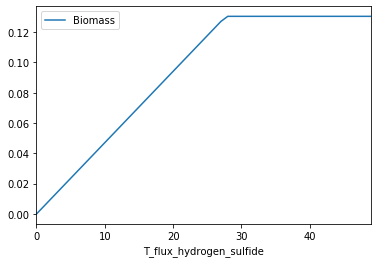

In [75]:
df.plot(kind='line')
plt.show()

In [44]:
pathways = ["GAPDH and PGK pathway",'Non-phosphorylation pathway','GAPDH and spontaneous degradation','GAPN',"Methylglyoxal pathway"]
key_pathway_reactions = ['carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN','carb_entner_4.1.2.55_DHDOGALDOL__RXN','other_no__pathway_3.6.1.7_BS165362','carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN']

##  The NGAM as objective reaction

In [45]:
pathways = ["GAPDH and PGK pathway",'Non-phosphorylation pathway','GAPDH and spontaneous degradation','GAPN',"Methylglyoxal pathway"]
key_pathway_reactions = ['carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN','carb_entner_4.1.2.55_DHDOGALDOL__RXN','other_no__pathway_3.6.1.7_BS165362','carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN']

In [46]:
df_NGAM_soxABCD = pd.DataFrame(columns=["NGAM_soxABCD"]) # start empty table
M = model.copy()
M.objective = M.reactions.NGAM
c = 0
for r in pathways: 
    sol = M.optimize()
    df_NGAM_soxABCD.loc[r] = sol.fluxes.loc["NGAM"]
    if c > 3:
        break
    M.reactions.get_by_id(key_pathway_reactions[c]).bounds = (0,0)
    c += 1 
df_NGAM_soxM = pd.DataFrame(columns=["NGAM_soxM"]) # start empty table
M = model.copy()
M.objective = M.reactions.NGAM
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
c = 0
for r in pathways: 
    sol = M.optimize()
    df_NGAM_soxM.loc[r] = sol.fluxes.loc["NGAM"]
    if c > 3:
        break
    M.reactions.get_by_id(key_pathway_reactions[c]).bounds = (0,0)
    c += 1 

In [47]:
frames = [df_NGAM_soxM, df_NGAM_soxABCD]
df_without_Biomass = pd.concat(frames, axis=1)
df_without_Biomass

,NGAM_soxM,NGAM_soxABCD
GAPDH and PGK pathway,7.75,13.75
Non-phosphorylation pathway,6.75,12.75
GAPDH and spontaneous degradation,6.75,12.75
GAPN,6.75,12.75
Methylglyoxal pathway,5.00,10.00


##  The Biomass as objective reaction

In [51]:
M = model.copy()

In [52]:
M.reactions.NGAM.bounds

(3.2814, 1000.0)

In [48]:
df_Biomass_soxABCD = pd.DataFrame(columns=["Biomass_soxABCD"]) # start empty table
M = model.copy()
M.objective = M.reactions.Biomass
c = 0
for r in pathways: 
    sol = M.optimize()
    df_Biomass_soxABCD.loc[r] = sol.fluxes.loc["Biomass"]
    if c > 3:
        break
    M.reactions.get_by_id(key_pathway_reactions[c]).bounds = (0,0)
    c += 1 
df_Biomass_soxM = pd.DataFrame(columns=["Biomass_soxM"]) # start empty table
M = model.copy()
M.objective = M.reactions.Biomass
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
c = 0
for r in pathways: 
    sol = M.optimize()
    df_Biomass_soxM.loc[r] = sol.fluxes.loc["Biomass"]
    if c > 3:
        break
    M.reactions.get_by_id(key_pathway_reactions[c]).bounds = (0,0)
    c += 1 

In [49]:
frames = [df_Biomass_soxM, df_Biomass_soxABCD]
df_with_Biomass = pd.concat(frames, axis=1)
df_with_Biomass

,Biomass_soxM,Biomass_soxABCD
GAPDH and PGK pathway,0.039063,0.063342
Non-phosphorylation pathway,0.031081,0.058398
GAPDH and spontaneous degradation,0.031081,0.058398
GAPN,0.031081,0.058398
Methylglyoxal pathway,0.015434,0.043103


# Shift between different pathways 

## Shift from pgk gapdh to methyglyoxal

In [ ]:
M = model.copy()
M.reactions.get_by_id("NGAM").bounds = (0,100)
M.objective = M.reactions.NGAM
for rxn in M.reactions:
    if "T_flux_L" in rxn.id:
        rxn.bounds = (0,0)
# M.reactions.get_by_id("cof_nad_1.4.3.16_BS413426").bounds = (0, 0)
M.reactions.get_by_id("aa_glu_1.4.1.3_GLUTAMATE__DEHYDROGENASE__NADP+__RXN_NADP").bounds = (0, 0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NAD").bounds = (0, 0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NADP").bounds = (0, 0)
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("carb_enter_glucneo_4.1.2.13_F16ALDOLASE__RXN").bounds = (0,0)
# df = pd.DataFrame(columns=["NGAM","glucose uptake","respiration","fermentation","respiration percent","fermentation percent"]) 
M.reactions.get_by_id('T_flux_(S)__lactic_acid').bounds = (0,0)

M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1,-1)
sol = M.optimize()
# df.loc[c] = [sol.fluxes.loc["NGAM"],abs(sol.fluxes.loc["T_flux_beta__D__glucose"]),sol.fluxes.loc["carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN"],sol.fluxes.loc["T_flux_(S)__lactic_acid"]]
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


In [ ]:
M = model.copy()
M.reactions.get_by_id("NGAM").bounds = (0,11)
M.objective = M.reactions.NGAM
for rxn in M.reactions:
    if "T_flux_L" in rxn.id:
        rxn.bounds = (0,0)
M.reactions.get_by_id("cof_nad_1.4.3.16_BS413426").bounds = (0, 0)
M.reactions.get_by_id("T_flux_sulfate").bounds = (0, 0)

M.reactions.get_by_id("aa_glu_1.4.1.3_GLUTAMATE__DEHYDROGENASE__NADP+__RXN_NADP").bounds = (0, 0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NAD").bounds = (0, 0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NADP").bounds = (0, 0)
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("carb_enter_glucneo_4.1.2.13_F16ALDOLASE__RXN").bounds = (0,0)
# df = pd.DataFrame(columns=["NGAM","glucose uptake","respiration","fermentation","respiration percent","fermentation percent"]) 
M.reactions.get_by_id('T_flux_(S)__lactic_acid').bounds = (0,0)

M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1,-1)
sol = M.optimize()
# df.loc[c] = [sol.fluxes.loc["NGAM"],abs(sol.fluxes.loc["T_flux_beta__D__glucose"]),sol.fluxes.loc["carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN"],sol.fluxes.loc["T_flux_(S)__lactic_acid"]]
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


In [ ]:
M = model.copy()
M.reactions.get_by_id("NGAM").bounds = (0,3)
M.objective = M.reactions.NGAM
for rxn in M.reactions:
    if "T_flux_L" in rxn.id:
        rxn.bounds = (0,0)
M.reactions.get_by_id("cof_nad_1.4.3.16_BS413426").bounds = (0, 0)
M.reactions.get_by_id("T_flux_sulfate").bounds = (0, 0)

M.reactions.get_by_id("T_flux_sulfate").bounds = (0, 0)
M.reactions.get_by_id("aa_glu_1.4.1.3_GLUTAMATE__DEHYDROGENASE__NADP+__RXN_NADP").bounds = (0, 0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NAD").bounds = (0, 0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NADP").bounds = (0, 0)
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("carb_enter_glucneo_4.1.2.13_F16ALDOLASE__RXN").bounds = (0,0)
# df = pd.DataFrame(columns=["NGAM","glucose uptake","respiration","fermentation","respiration percent","fermentation percent"]) 
M.reactions.get_by_id('T_flux_(S)__lactic_acid').bounds = (0,0)

M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1,-1)
sol = M.optimize()
# df.loc[c] = [sol.fluxes.loc["NGAM"],abs(sol.fluxes.loc["T_flux_beta__D__glucose"]),sol.fluxes.loc["carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN"],sol.fluxes.loc["T_flux_(S)__lactic_acid"]]
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


## The shift from anaerobic to Aerobic

[allosteric enzyme regluation] (https://www.khanacademy.org/science/biology/cellular-respiration-and-fermentation/variations-on-cellular-respiration/a/regulation-of-cellular-respiration)

In [ ]:
for rxn in model.metabolites.acetate.reactions:
    print (rxn)

# Methodology for dealing with variable stoichiometry

In [78]:
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').reaction

'6.0 H+ + 0.5 oxygen + representative_quinol --> 4.0 H+_rc + H2O + representative_quinone'

In [81]:
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxM_TRANS__RXN__240').reaction

'2.0 H+ + 0.5 oxygen + representative_quinol --> 2.0 H+_rc + H2O + representative_quinone'

In [76]:
df_variable_stoichiometry = pd.DataFrame(columns=["Factor Z","SoxABCD","SoxM","NGAM"]) # start empty table
M = model.copy()
M.objective = M.reactions.NGAM
M.reactions.T_flux_beta__D__glucose.bounds = (-1,1000)
for Z in range(0,13):
    M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds =(0,Z) 
    M.reactions.get_by_id('oxp_redox_1.10.3.13_soxM_TRANS__RXN__240').bounds =(0,12-Z) 
    sol = M.optimize()
    df_variable_stoichiometry.loc[Z] = [Z,sol.fluxes.loc["oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240"],sol.fluxes.loc["oxp_redox_1.10.3.13_soxM_TRANS__RXN__240"],sol.fluxes.loc["NGAM"]] 
df_variable_stoichiometry = df_variable_stoichiometry.set_index('Factor Z')
df_variable_stoichiometry

,SoxABCD,SoxM,NGAM
Factor Z,,,
0.0,0.0,1.200000e+01,7.75
1.0,1.0,1.100000e+01,8.25
2.0,2.0,1.000000e+01,8.75
3.0,3.0,9.000000e+00,9.25
4.0,4.0,8.000000e+00,9.75
5.0,5.0,7.000000e+00,10.25
6.0,6.0,6.000000e+00,10.75
7.0,7.0,5.000000e+00,11.25
8.0,8.0,4.000000e+00,11.75


# Overview of sulfolobus solfataricus map

In [77]:
df_overview_of_map = pd.DataFrame(columns=["Reactions","Metabolites","Compartment"])
df_overview_of_map.loc["overview"] = [len(model.reactions),len(model.metabolites),len(model.compartments)]
df_overview_of_map

,Reactions,Metabolites,Compartment
overview,993,865,2
